# Electricity Dataset
Assume user downloaded archive.zip from Kaggle,
renamed the file BuildingData.zip,
and stored the file in the data subdirectory.
Assume the zip file contains the electricity_cleaned.csv file.  

In [14]:
DATAPATH=''
try:
    # On Google Drive, set path to my drive / data directory.
    from google.colab import drive
    IN_COLAB = True
    PATH='/content/drive/'
    drive.mount(PATH)
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
except:
    # On home computer, set path to local data directory.
    IN_COLAB = False
    DATAPATH='C:/'  # must end in "/"

ZIP_FILE='BuildingData.zip'
ZIP_PATH = DATAPATH+ZIP_FILE
ELEC_FILE='electricity_cleaned.csv'
MODEL_FILE='Model'  # will be used later to save models

In [15]:
from os import listdir
import csv
from zipfile import ZipFile
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)

In [16]:
def read_csv_to_numpy(filename): # array of string, header=row[0]
    with open(ELEC_PATH,'r') as handle:
        data_iter = csv.reader(handle,delimiter = ',',quotechar = '"')
        data = [data for data in data_iter]
        return np.asarray(data, dtype = None)
# Pandas incorporates column headers, row numbers, timestamps, and NaN for missing values.
def read_csv_to_panda(filename): # pandas data frame
    return pd.read_csv(filename)
def read_zip_to_panda(zip_filename,csv_filename):
    zip_handle = ZipFile(zip_filename)
    csv_handle = zip_handle.open(csv_filename)
    panda = pd.read_csv(csv_handle)
    return panda

In [17]:
elec_df = read_zip_to_panda(ZIP_PATH,ELEC_FILE)
elec_df

,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,...,96.925,704.950,111.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,...,97.550,695.700,115.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,...,93.825,687.325,111.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17542,2017-12-31 22:00:00,16.9233,137.6266,3.2876,82.3359,109.6282,460.5889,49.6776,35.7069,14.8829,...,94.150,674.275,111.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def show_sample_panda(df):
    print("The data is stored in this class:",type(df))
    print("Shape:",df.shape)
    data=df.iloc[0]
    print("First two column names:",df.columns[0],df.columns[1])
    print("First two column types:",df.dtypes[0],df.dtypes[1])
    print("First data row:",data[0],data[1],"...",data[-2],data[-1])
    data=df.iloc[-1]
    print("Last two column names:",df.columns[-2],df.columns[-1])
    print("Last two column types:",df.dtypes[-2],df.dtypes[-1])
    print("Last data row:",data[0],data[1],"...",data[-2],data[-1])
    df.describe()
show_sample_panda(elec_df)

The data is stored in this class: <class 'pandas.core.frame.DataFrame'>
Shape: (17544, 1579)
First two column names: timestamp Panther_parking_Lorriane
First two column types: object float64
First data row: 2016-01-01 00:00:00 nan ... 135.0 168.2243
Last two column names: Mouse_health_Estela Mouse_science_Micheal
Last two column types: float64 float64
Last data row: 2017-12-31 23:00:00 11.8223 ... nan nan


In [19]:
# Pandas statistics per column. Counts excludes NaN columns and values.
elec_df.describe()

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
count,14162.000000,14193.000000,14154.000000,14156.000000,14156.000000,14158.000000,14156.000000,14156.000000,14287.000000,13176.000000,...,16110.000000,16116.000000,16113.000000,6066.000000,15881.000000,15888.000000,15871.000000,15723.000000,15886.000000,7252.000000
mean,10.722723,135.054565,6.683938,140.593488,156.466222,485.629363,119.536869,26.908498,33.433645,0.791095,...,181.787028,770.348807,129.774161,17.679361,532.679783,45.767561,783.350343,43.587324,384.684218,435.844964
std,2.760181,21.643981,3.672796,29.975263,40.821717,41.687667,46.208003,9.346666,8.538604,0.257034,...,54.150864,47.807854,37.264065,1.519220,226.737707,13.847546,176.618193,20.946759,95.102666,238.250030
min,2.100400,12.002300,1.123200,16.163100,4.666900,46.809000,7.536500,4.100800,3.440700,0.220000,...,83.350000,548.800000,60.050000,6.896600,93.482000,10.000000,0.001700,6.000000,2.000000,142.857100
25%,8.581600,119.373000,3.684700,120.983300,120.600550,462.689300,80.334500,16.803300,27.125200,0.550100,...,133.425000,734.568750,97.525000,17.644900,345.575000,35.000000,647.712250,27.000000,309.000000,336.448600
50%,10.622000,132.975700,5.961650,145.548100,153.938200,476.491900,114.684600,31.356000,37.607300,0.850200,...,172.487500,763.925000,126.550000,17.644900,464.973000,40.923800,750.491000,35.000000,349.000000,336.448600
75%,12.902500,149.278800,8.764450,161.471200,187.279850,512.398900,157.318575,36.006900,39.447600,0.910200,...,228.875000,803.293750,158.825000,17.644900,701.798000,60.000000,887.638500,60.000000,465.000000,336.448600
max,25.497200,285.451200,27.770400,298.053200,375.038400,1052.711000,279.125900,54.804300,74.733100,1.520300,...,316.350000,925.550000,278.575000,40.816300,1267.846000,100.000000,1487.017000,126.000000,665.000000,2000.000000


In [20]:
park_cols = [c for c in elec_df.columns if 'parking' in c]
print(park_cols)

['Panther_parking_Lorriane', 'Panther_parking_Asia', 'Panther_parking_Alaina', 'Panther_parking_Mellissa', 'Panther_parking_Charlene', 'Panther_parking_Stanley', 'Panther_parking_Adela', 'Panther_parking_Jody', 'Fox_parking_Tommie', 'Fox_parking_Lynelle', 'Fox_parking_Felipa', 'Rat_parking_Ronnie', 'Bear_parking_Bridget', 'Bear_parking_Bruce', 'Bear_parking_Gordon', 'Hog_parking_Antoinette', 'Hog_parking_Joan', 'Hog_parking_Marcus', 'Hog_parking_Bernardo', 'Hog_parking_Jean', 'Hog_parking_Cliff', 'Hog_parking_Jeana', 'Hog_parking_Shannon']


<AxesSubplot:>

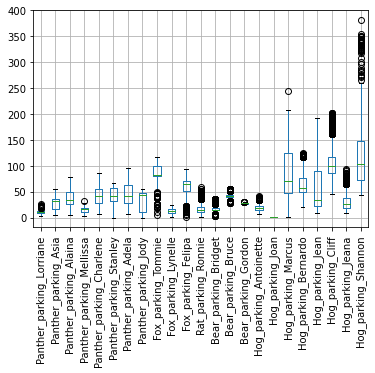

In [22]:
elec_df.boxplot(park_cols,rot=90)

In [13]:
def describe_columns(df,cols):
    data_source = {}
    usage_category = {}
    building = {}
    for c in df.columns:
        if 'timestamp' not in c:
            w1,w2,w3=c.split('_')        
            data_source[w1] = data_source.get(w1,0)+1
            usage_category[w2] = usage_category.get(w2,0)+1
            building[w3] = building.get(w3,0)+1
    print("Data sources are given animal code names like Bear.")
    print("Data sources are single locations e.g. a college campus.")
    print("We have one stream of weather data from each data source.")
    print("Number of data sources:",len(data_source))
    print("Number of buildings with data per data source:\n",data_source)
    print()
    print("Buildings are categorized by primary space usage like Parking.")
    print("Number of data categories:",len(usage_category))
    print("Number of buildings with data per category:\n",usage_category)
    print()
    print("Each building is given a person name like Lula.")
    print("Number of distinct building names:",len(building))
    print()
    print("Note that Robin is an animal, not a building name.")
    
describe_columns(elec_df,elec_df.columns)

Data sources are given animal code names like Bear.
Data sources are single locations e.g. a college campus.
We have one stream of weather data from each data source.
Number of data sources: 19
Number of buildings with data per data source:
 {'Panther': 105, 'Robin': 52, 'Fox': 137, 'Rat': 305, 'Bear': 92, 'Lamb': 146, 'Peacock': 45, 'Moose': 13, 'Gator': 74, 'Bull': 123, 'Bobcat': 35, 'Crow': 5, 'Shrew': 9, 'Swan': 19, 'Wolf': 36, 'Hog': 152, 'Eagle': 106, 'Cockatoo': 117, 'Mouse': 7}

Buildings are categorized by primary space usage like Parking.
Number of data categories: 17
Number of buildings with data per category:
 {'parking': 23, 'lodging': 149, 'office': 296, 'education': 604, 'retail': 11, 'assembly': 203, 'other': 26, 'public': 166, 'warehouse': 14, 'food': 6, 'utility': 4, 'health': 27, 'religion': 3, 'science': 7, 'industrial': 11, 'services': 9, 'unknown': 19}

Each building is given a person name like Lula.
Number of distinct building names: 1578

Note that Robin is an a